# Lending Club Case Study

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading Input Data

In [2]:
# Reading input Loan Data file 
loandf = pd.read_csv("loan.csv")

In [3]:
#Reading Data first 5 records
loandf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Understanding Structure of Data

In [4]:
#Understand the dimension of data. No.of columns and Rows
loandf.shape

(39717, 111)

In [5]:
# Types of data in Loan data
loandf.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [6]:
# Information of loan data. 
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning
### Missing value checks

In [7]:
#Identify number of records having null information
loandf.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
# Most of the columns have null value == total no. of rows . Meaning entire column is null
# Identifying columns with more than 50% missing values
missing = loandf.isna().mean()
columns_to_drop = missing[missing > 0.5].index
columns_to_drop

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [9]:
# Dropping columns with more than 50% missing values
loandf.drop(columns=columns_to_drop, inplace=True)

In [10]:
# Shape of loan dataframe after removing missing values
loandf.shape

(39717, 54)

In [11]:
loandf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [12]:
# Let's analyze other categorical variables. One of them is desc column.
loandf['desc'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              210
Debt Consolidation                                                                                                                                                                                                                                                                                                                                    

In [13]:
# Dropping desc column as the values are text and dont contribute to analysis
loandf.drop(columns=['desc'], inplace=True)
loandf.shape

(39717, 53)

In [14]:
# Analysing 'pub_rec' column
loandf['pub_rec'].value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [15]:
loandf['pub_rec'].isna().sum()

0

In [16]:
# Analysing 'pub_rec_bankruptcies' column
loandf['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [17]:
loandf['pub_rec_bankruptcies'].isna().sum()

697

In [18]:
# Manipulating the pub_rec_bankruptcies column with mode value
loandf['pub_rec_bankruptcies'] = loandf['pub_rec_bankruptcies'].fillna(loandf['pub_rec_bankruptcies'].mode()[0])
loandf['pub_rec_bankruptcies'].value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [19]:
loandf['pub_rec_bankruptcies'].isna().sum()

0

In [20]:
loandf["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [21]:
#Remove Rows with Loan status as current as its still running loans and cant be used for analysis
loandf = loandf[~(loandf['loan_status'] == 'Current')]

In [22]:
loandf["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [23]:
#Check for null values again 
loandf.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2386
emp_length                    1033
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [24]:
loandf["title"].describe()

count                  38566
unique                 19297
top       Debt Consolidation
freq                    2090
Name: title, dtype: object

In [25]:
# Title is also Text column which has lot of unique values. Drop the column
loandf.drop(columns=['title'],inplace=True)
loandf.shape

(38577, 52)

In [26]:
loandf.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [27]:
loandf.nunique().sort_values()

tax_liens                         1
initial_list_status               1
out_prncp                         1
out_prncp_inv                     1
collections_12_mths_ex_med        1
policy_code                       1
pymnt_plan                        1
application_type                  1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                

In [28]:
#Subset the Loan Data by removing Behavioural Data columns and columns that have unique values 
loandfNew = loandf[['id', #'member_id'
              'loan_amnt', 'funded_amnt', 'funded_amnt_inv','term', 'int_rate', 'installment', 'grade',
              'sub_grade',
              'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
               'issue_d', 'loan_status', #'pymnt_plan', 
               # 'url',
                'purpose', 'zip_code',
               'addr_state', 'dti', # 'delinq_2yrs', 'earliest_cr_line',
               'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
               'total_acc', #'initial_list_status', 'out_prncp', 'out_prncp_inv',
               #'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
               #'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
               #'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
               #'collections_12_mths_ex_med', #'policy_code', 'application_type',
               #'acc_now_delinq', #'chargeoff_within_12_mths', 'delinq_amnt',
               'pub_rec_bankruptcies', #'tax_liens'
                ]]

In [29]:
loandfNew.shape

(38577, 27)

In [30]:
loandfNew.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,860xx,AZ,27.65,1,3,0,13648,83.70%,9,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,309xx,GA,1.00,5,3,0,1687,9.40%,4,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,606xx,IL,8.72,2,2,0,2956,98.50%,10,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,917xx,CA,20.00,1,10,0,5598,21%,37,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,852xx,AZ,11.20,3,9,0,7963,28.30%,12,0.0


In [31]:
loandfNew.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

## Handling Missing values
 - Missing values are present in "emp_length", "revol_util".
 - Check if mode(emp_len) and frequency of emp_len is higher to replace the missing values with mode()

In [32]:
print("Mode : " + loandfNew['emp_length'].mode()[0])
loandfNew['emp_length'].value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [33]:
loandfNew['emp_length'].fillna(loandfNew['emp_length'].mode()[0], inplace = True)
loandfNew['emp_length'].isna().sum()

0

### Standardize values
Below four columns can be categorized as continuous variables, hence converting them into int/float case to case:
1. revol_util: Standardise this value by trimming off % and convert to numeric value.
2. int_rate: Standardise this value by trimming off % and convert to numeric value.
3. term: Standardise this value by trimming off 'months' and convert to numeric value.
4. emp_length: Standardise this value by trimming off 'years' and convert to numeric value. <1 year is treated as 0 and 10+ years is treated as 10.

In [34]:
loandfNew['revol_util'] = loandfNew['revol_util'].apply(lambda x : str(x))
loandfNew['revol_util'] = loandfNew['revol_util'].apply(lambda x : float(0) if not x else float(x.split('%')[0]))

In [35]:
loandfNew['int_rate'] = loandfNew['int_rate'].apply(lambda x : str(x))
loandfNew['int_rate'] = loandfNew['int_rate'].apply(lambda x : float(0) if not x else float(x.split('%')[0]))

In [36]:
loandfNew['term'] = loandfNew['term'].apply(lambda x : str(x))
loandfNew['term'] = loandfNew['term'].apply(lambda x : int(0) if not x else int(x.split('months')[0]))

In [37]:
loandfNew['emp_length'] = loandfNew['emp_length'].apply(lambda x : str(x))
loandfNew['emp_length'] = loandfNew['emp_length'].apply(lambda x: int(0) if "<" in x else (int((x.split('+')[0])) if "+" in x else int(x.split()[0])))

In [38]:
loandfNew.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,...,860xx,AZ,27.65,1,3,0,13648,83.7,9,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,...,309xx,GA,1.00,5,3,0,1687,9.4,4,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,...,606xx,IL,8.72,2,2,0,2956,98.5,10,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,917xx,CA,20.00,1,10,0,5598,21.0,37,0.0
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,...,852xx,AZ,11.20,3,9,0,7963,28.3,12,0.0


### Check for outliers in each of the columns with continuous variables
Checking for below columns:
- annual_inc
- dti
- loan_amnt
- funded_amnt_inv

<Axes: ylabel='annual_inc'>

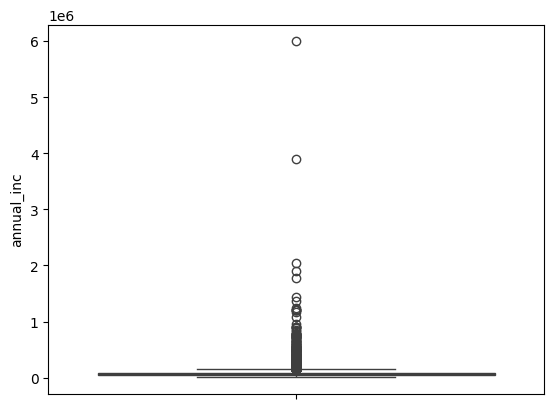

In [39]:
# Outlier check for annual_inc
sns.boxplot(loandfNew['annual_inc'])

In [40]:
loandfNew['annual_inc'].quantile([0.5, 0.75, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99])

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.96    150000.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

<Axes: ylabel='annual_inc'>

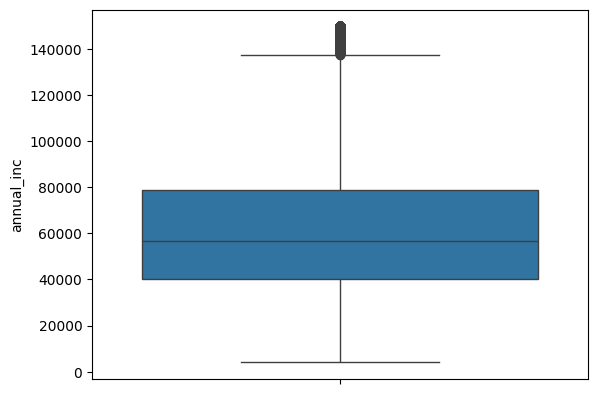

In [41]:
# Data above 96th percentile looks to be outliers, hence removing them and replotting again.
loandfNew = loandfNew[loandfNew['annual_inc'] <= loandfNew['annual_inc'].quantile(0.96)]
sns.boxplot(loandfNew['annual_inc'])

<Axes: ylabel='dti'>

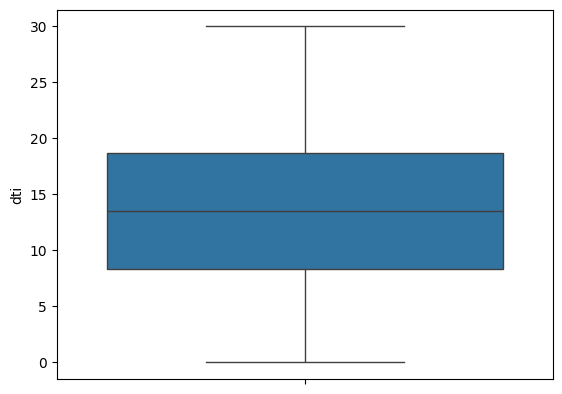

In [42]:
# Outlier check for dti
sns.boxplot(loandfNew['dti'])

In [43]:
# Clearly no outliers observed in 'dti' column.

<Axes: ylabel='loan_amnt'>

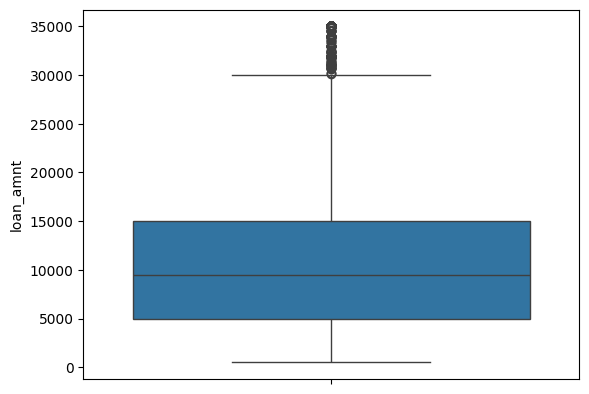

In [44]:
# Outlier check for loan_amnt
sns.boxplot(loandfNew['loan_amnt'])

In [45]:
# loan_amnt data looks to be continous, hence, not taking any action here.

<Axes: ylabel='funded_amnt_inv'>

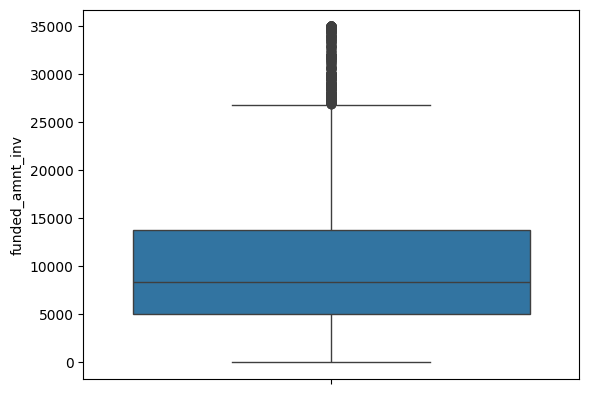

In [46]:
# Outlier check for funded_amnt_inv
sns.boxplot(loandfNew['funded_amnt_inv'])

In [47]:
# funded_amnt_inv data looks to be continous, hence, not taking any action here.

In [48]:
loandfNew.shape

(37091, 27)

In [49]:
# Since 'emp_title' is not a category data , no proper conclusion can be drawn from as to how this might affect repayment of loans
# Hence dropping this column
loandfNew.drop(columns='emp_title', inplace=True)

In [50]:
loandfNew.shape

(37091, 26)

In [51]:
loandfNew.isna().sum()

id                       0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_length               0
home_ownership           0
annual_inc               0
verification_status      0
issue_d                  0
loan_status              0
purpose                  0
zip_code                 0
addr_state               0
dti                      0
inq_last_6mths           0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util              49
total_acc                0
pub_rec_bankruptcies     0
dtype: int64

In [52]:
# Getting the statistical info about the column
loandfNew['revol_util'].describe()

count    37042.000000
mean        48.660187
std         28.297239
min          0.000000
25%         25.200000
50%         49.000000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64

In [53]:
# Filling the missing values with the mean
loandfNew['revol_util'].fillna(loandfNew['revol_util'].mean(), inplace=True)

In [54]:
loandfNew.isna().sum()

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

In [55]:
# All the columns contain non-null values.

### Analyzing various fields columns

In [56]:
#Analyzing emp_length column 
loandfNew['emp_length'].value_counts()

10    9040
0     4382
2     4138
3     3869
4     3232
5     3077
1     3073
6     2092
7     1657
8     1360
9     1171
Name: emp_length, dtype: int64

In [57]:
# Analysing 'int_rate' column
loandfNew['int_rate'].value_counts()

10.99    878
7.51     770
11.49    763
13.49    731
7.88     707
        ... 
16.96      1
16.01      1
17.34      1
16.71      1
15.01      1
Name: int_rate, Length: 370, dtype: int64

In [58]:
# For 'home_ownership' column
loandfNew['home_ownership'].value_counts()

RENT        18135
MORTGAGE    15980
OWN          2880
OTHER          93
NONE            3
Name: home_ownership, dtype: int64

In [59]:
# Analysing 'loan_status' column
loandfNew['loan_status'].value_counts()

Fully Paid     31627
Charged Off     5464
Name: loan_status, dtype: int64

In [60]:
# Analysing 'verification_status' column
loandfNew['verification_status'].value_counts()

Not Verified       16395
Verified           11434
Source Verified     9262
Name: verification_status, dtype: int64

## Understanding the categorical variables by plotting
- grade
- sub_grades
- home_ownership
- purpose
- verification_status
- loan_status
- emp_length  

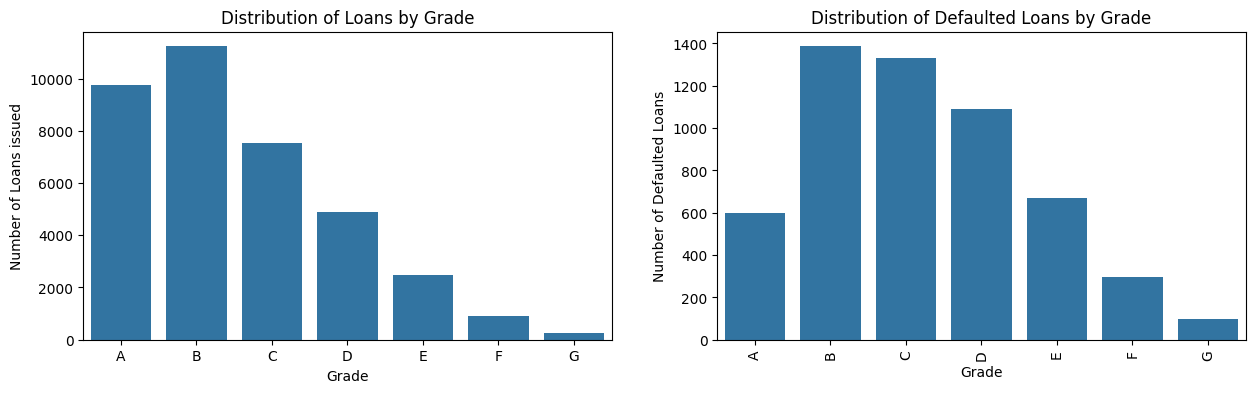

In [61]:
# Plotting graph by grade
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.countplot( x="grade", data=loandfNew, order = np.sort(loandfNew['grade'].unique()))
plt.title("Distribution of Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

plt.subplot(1,2,2)
sns.countplot( x="grade", data=loandfNew[loandfNew['loan_status'] == 'Charged Off'], order = np.sort(loandfNew['grade'].unique()))
plt.title("Distribution of Defaulted Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Defaulted Loans")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

#### Conclusions drawn on distribution of loans disbursed against Loan grades
- More number of loans disbursed were of Grade B type, followed by Grade A type of loans

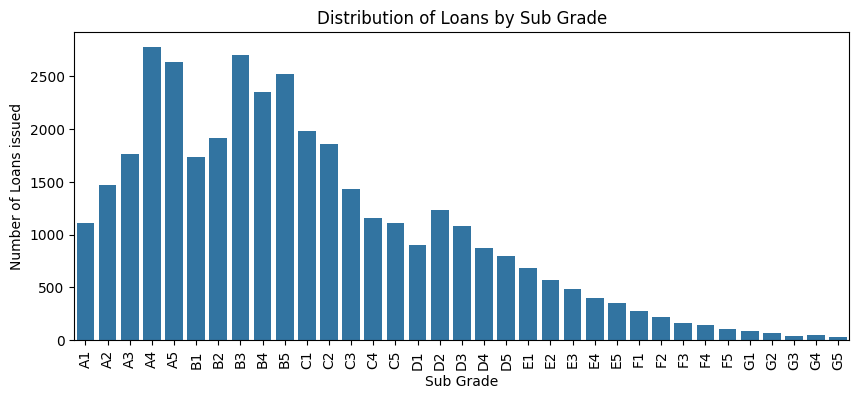

In [62]:
# Plotting graph by grade
plt.figure(figsize=(10,4))

sns.countplot( x="sub_grade", data=loandfNew, order = np.sort(loandfNew['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

#### Conclusions drawn on distribution of loans disbursed against Loan sub-grades
- More number of loans disbursed were of Sug-grades A4, B3, A5, B5, followed by others.

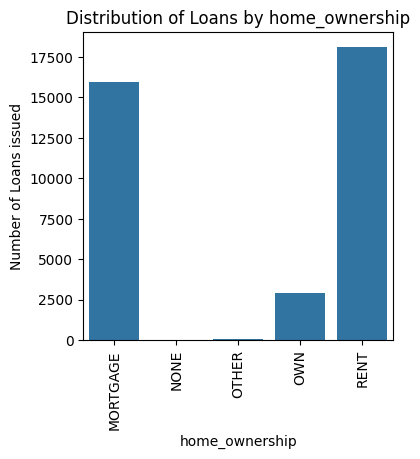

In [63]:
# Plotting graph by home_ownership
plt.figure(figsize=(4,4))

sns.countplot( x="home_ownership", data=loandfNew, order = np.sort(loandfNew['home_ownership'].unique()))
plt.title("Distribution of Loans by home_ownership")
plt.xlabel("home_ownership")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

#### Conclusions drawn on distribution of loans disbursed against home_ownership of the loan holders
- Loans were sanctioned predominantly to those loan holders who are either living on RENT or on Mortagage.

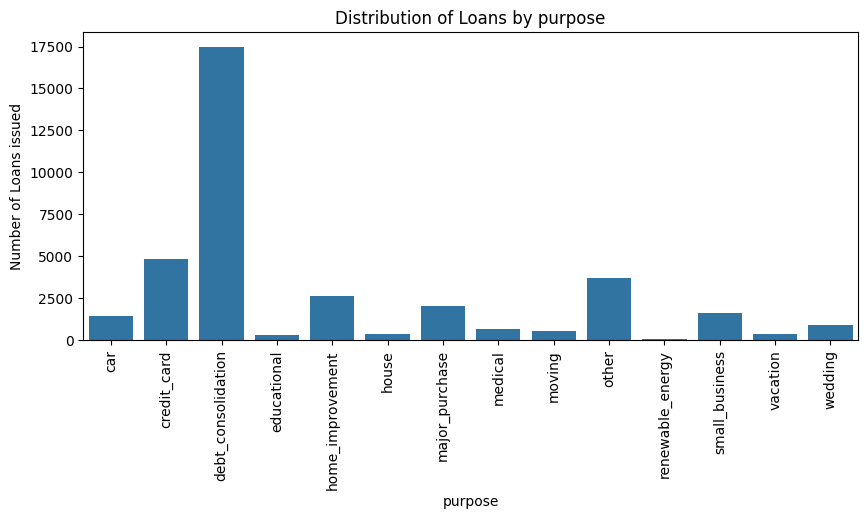

In [64]:
# Plotting graph by purpose
plt.figure(figsize=(10,4))

sns.countplot( x="purpose", data=loandfNew, order = np.sort(loandfNew['purpose'].unique()))
plt.title("Distribution of Loans by purpose")
plt.xlabel("purpose")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

#### Conclusions drawn on distribution of loans disbursed against purpose of loans taken
- Predominantly, loans were taken by those who want to use them for debt-consolidation. This gives a picture that they are trying to rotate the loan amount from one to other, which is not bad sign for the company
- Loans were also taken by those who wish to pay the credit card bills.


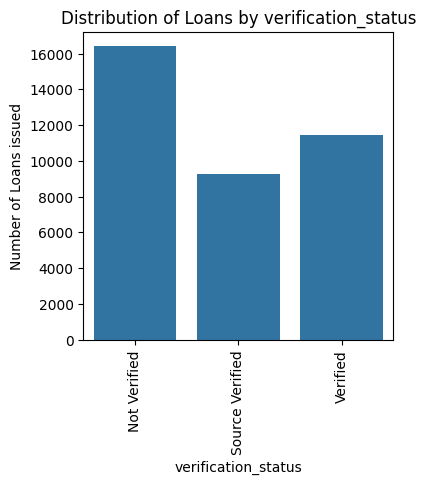

In [65]:
# Plotting graph by verification_status
plt.figure(figsize=(4,4))

sns.countplot( x="verification_status", data=loandfNew, order = np.sort(loandfNew['verification_status'].unique()))
plt.title("Distribution of Loans by verification_status")
plt.xlabel("verification_status")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

#### Conclusions drawn on distribution of loans disbursed against verification status
- More than 40% of the loans were disbursed to those who are not verified. This is one more alarming factor.

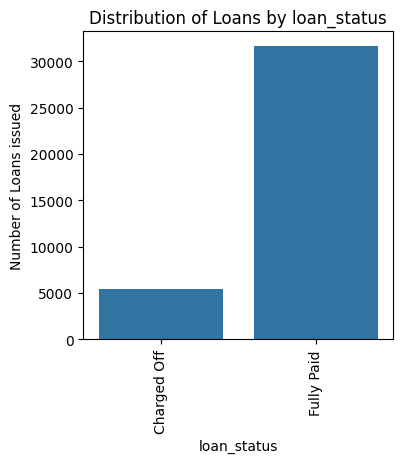

In [66]:
# Plotting graph by loan_status
plt.figure(figsize=(4,4))

sns.countplot( x="loan_status", data=loandfNew, order = np.sort(loandfNew['loan_status'].unique()))
plt.title("Distribution of Loans by loan_status")
plt.xlabel("loan_status")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

#### Conclusions drawn on distribution of loans disbursed against Loan status
- 13% of the loans were charged-off in camparison with those paid. In the subsequest sections, we'll analyze driving factors on why the loans were charged-off

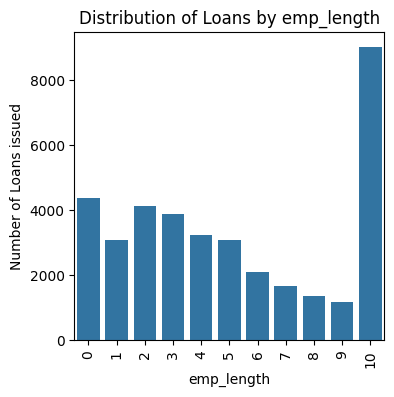

In [67]:
# Plotting graph by emp_length
plt.figure(figsize=(4,4))

sns.countplot( x="emp_length", data=loandfNew, order = np.sort(loandfNew['emp_length'].unique()))
plt.title("Distribution of Loans by emp_length")
plt.xlabel("emp_length")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

#### Conclusions drawn on distribution of loans disbursed against Length of employment
- Large number of loans were disbursed to those whose employment is 10+ years.
- Another interesting point is that those with <1 year employment were more prone to taking loans.

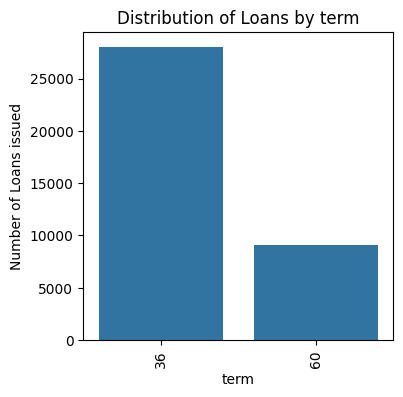

In [68]:
# Plotting graph by term
plt.figure(figsize=(4,4))

sns.countplot( x="term", data=loandfNew, order = np.sort(loandfNew['term'].unique()))
plt.title("Distribution of Loans by term")
plt.xlabel("term")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

#### Conclusions drawn on distribution of loans disbursed against Loan term
- Majority of the loans were taken for shorter loan term, i.e., 36 months

<Axes: ylabel='addr_state'>

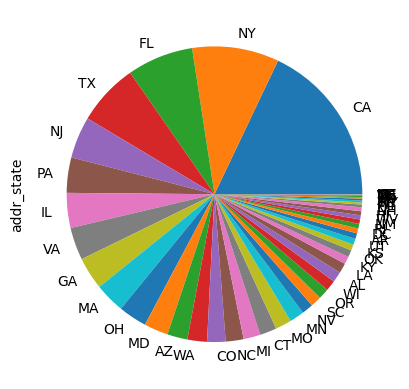

In [69]:
#Radhika
#Distribution of loans by Address state
#using Pie plot to visualize
loandfNew['addr_state'].value_counts().plot(kind="pie")

In [70]:
#Radhika
#Most of loan applicants are from CA state

## Understanding the continuous variables by making them categorical using plotting
- int_rate_groups
- open_acc_groups
- revol_util_groups
- total_acc_groups
- annual_inc_groups

In [71]:
loandfNew['int_rate'].describe()

count    37091.000000
mean        11.893714
std          3.672804
min          5.420000
25%          8.940000
50%         11.710000
75%         14.300000
max         24.400000
Name: int_rate, dtype: float64

In [72]:
# Creating bins for int_rate_groups
loandfNew['int_rate_groups'] = pd.cut(loandfNew['int_rate'], bins=5, precision=0, labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

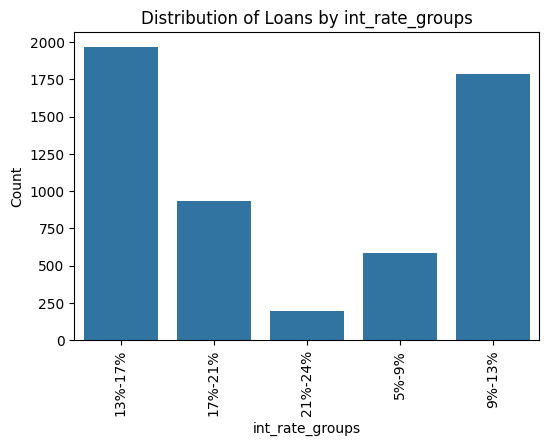

In [73]:
# Plotting graph by int_rate_groups that are charged-off
plt.figure(figsize=(6,4))

sns.countplot( x="int_rate_groups", data=loandfNew[loandfNew['loan_status'] == 'Charged Off'], order = np.sort(loandfNew['int_rate_groups'].unique()))
plt.title("Distribution of Loans by int_rate_groups")
plt.xlabel("int_rate_groups")
plt.ylabel("Count")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

In [74]:
loandfNew['open_acc'].describe()

count    37091.000000
mean         9.185948
std          4.360811
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [75]:
# Creating bins for open_acc_groups
loandfNew['open_acc_groups'] = pd.cut(loandfNew['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])

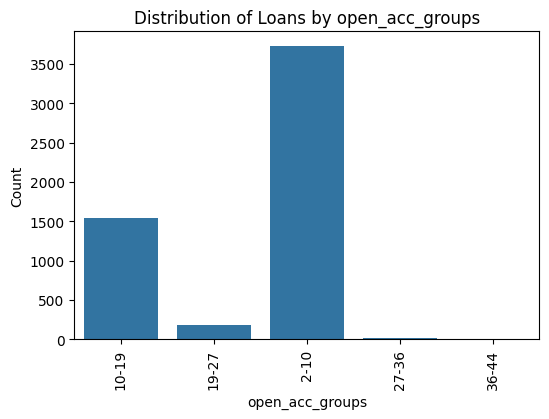

In [76]:
# Plotting graph by open_acc_groups that are charged-off
plt.figure(figsize=(6,4))

sns.countplot( x="open_acc_groups", data=loandfNew[loandfNew['loan_status'] == 'Charged Off'], order = np.sort(loandfNew['open_acc_groups'].unique()))
plt.title("Distribution of Loans by open_acc_groups")
plt.xlabel("open_acc_groups")
plt.ylabel("Count")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

In [77]:
loandfNew['revol_util'].describe()

count    37091.000000
mean        48.660187
std         28.278541
min          0.000000
25%         25.300000
50%         49.000000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64

In [78]:
# Creating bins for revol_util_groups
loandfNew['revol_util_groups'] = pd.cut(loandfNew['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])

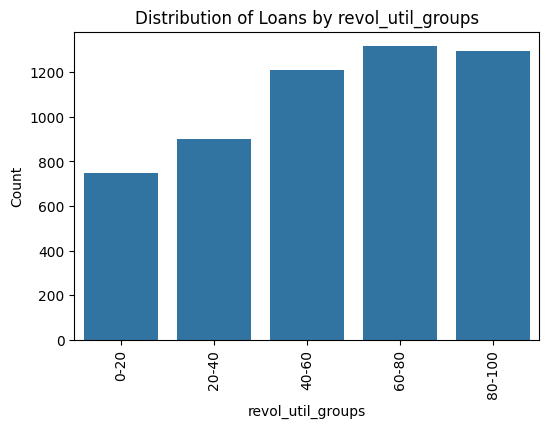

In [79]:
# Plotting graph by revol_util_groups that are charged-off
plt.figure(figsize=(6,4))

sns.countplot( x="revol_util_groups", data=loandfNew[loandfNew['loan_status'] == 'Charged Off'], order = np.sort(loandfNew['revol_util_groups'].unique()))
plt.title("Distribution of Loans by revol_util_groups")
plt.xlabel("revol_util_groups")
plt.ylabel("Count")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

In [80]:
loandfNew['total_acc'].describe()

count    37091.000000
mean        21.715834
std         11.262141
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

In [81]:
# Creating bins for revol_util_groups
loandfNew['total_acc_groups'] = pd.cut(loandfNew['total_acc'], bins=5, precision=0, labels=['2-20','20-37','37-55','55-74','74-90'])

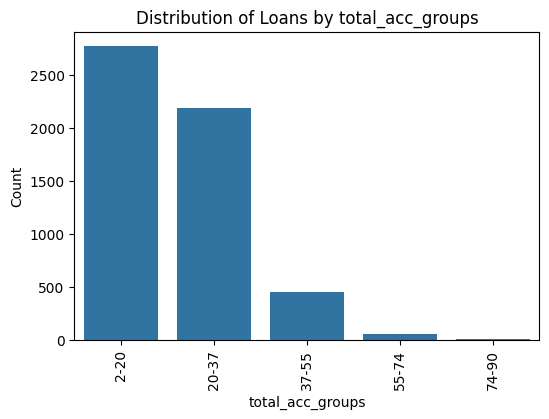

In [82]:
# Plotting graph by total_acc_groups that are charged-off
plt.figure(figsize=(6,4))

sns.countplot( x="total_acc_groups", data=loandfNew[loandfNew['loan_status'] == 'Charged Off'], order = np.sort(loandfNew['total_acc_groups'].unique()))
plt.title("Distribution of Loans by total_acc_groups")
plt.xlabel("total_acc_groups")
plt.ylabel("Count")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

In [83]:
loandfNew['annual_inc'].describe()

count     37091.000000
mean      61875.090474
std       29125.064445
min        4000.000000
25%       40000.000000
50%       56650.000000
75%       79000.000000
max      150000.000000
Name: annual_inc, dtype: float64

In [84]:
# Creating bins for annual_inc_groups
loandfNew['annual_inc_groups'] = pd.cut(loandfNew['annual_inc'], bins=5, precision=0, labels=['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

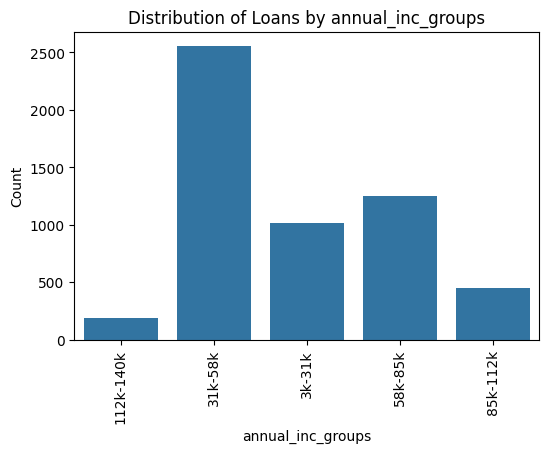

In [85]:
# Plotting graph by annual_inc_groups that are charged-off
plt.figure(figsize=(6,4))

sns.countplot( x="annual_inc_groups", data=loandfNew[loandfNew['loan_status'] == 'Charged Off'], order = np.sort(loandfNew['annual_inc_groups'].unique()))
plt.title("Distribution of Loans by annual_inc_groups")
plt.xlabel("annual_inc_groups")
plt.ylabel("Count")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

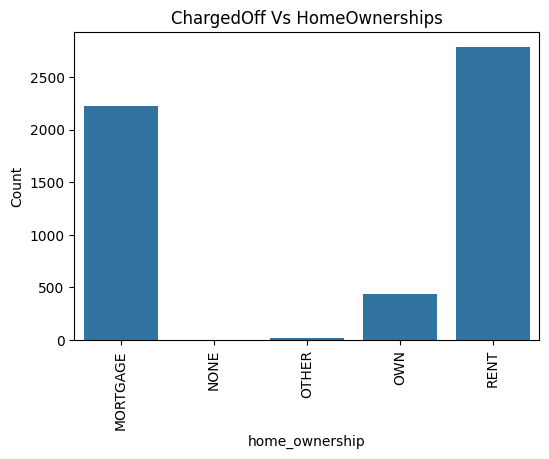

In [86]:
#Radhika
# Plotting graph by Homeownership that are charged-off
plt.figure(figsize=(6,4))

sns.countplot( x="home_ownership", data=loandfNew[loandfNew['loan_status'] == 'Charged Off'], order = np.sort(loandfNew['home_ownership'].unique()))
plt.title("ChargedOff Vs HomeOwnerships")
plt.xlabel("home_ownership")
plt.ylabel("Count")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

In [87]:
#Radhika
# Those who are not owning the home is having high chances of loan defaults. Followed by those who have already Mortgaged the house

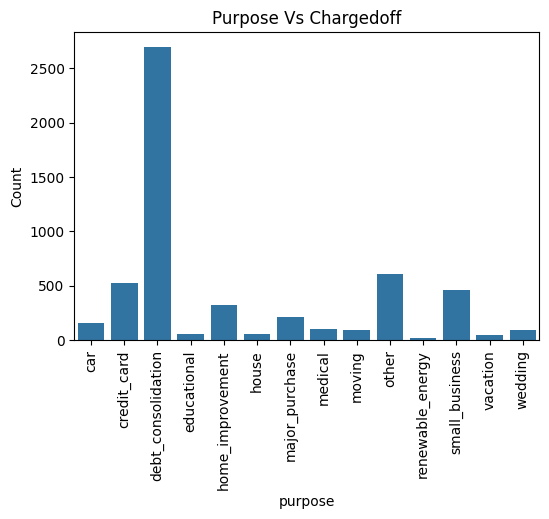

In [88]:
#Radhika
# Plotting graph by Purspose of Loan to that are charged-off
plt.figure(figsize=(6,4))

sns.countplot( x="purpose", data=loandfNew[loandfNew['loan_status'] == 'Charged Off'], order = np.sort(loandfNew['purpose'].unique()))
plt.title("Purpose Vs Chargedoff")
plt.xlabel("purpose")
plt.ylabel("Count")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

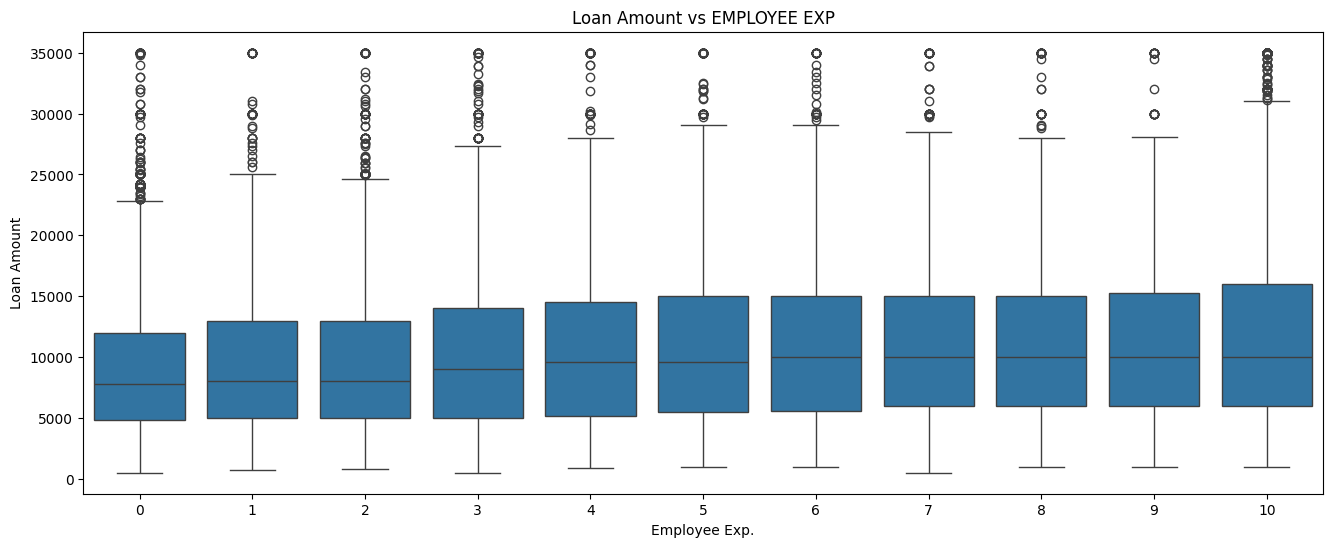

In [94]:
#Radhika
plt.figure(figsize=(16,6))
ax=sns.boxplot(x='emp_length',y='loan_amnt',data=loandfNew)
ax.set(xlabel='Employee Exp.', ylabel='Loan Amount',title='Loan Amount vs EMPLOYEE EXP')
plt.show()

In [ ]:
#Radhika
# with bivariate analysis it is observed that employee with 10+ years of experience is having requirement of higher loan amount 

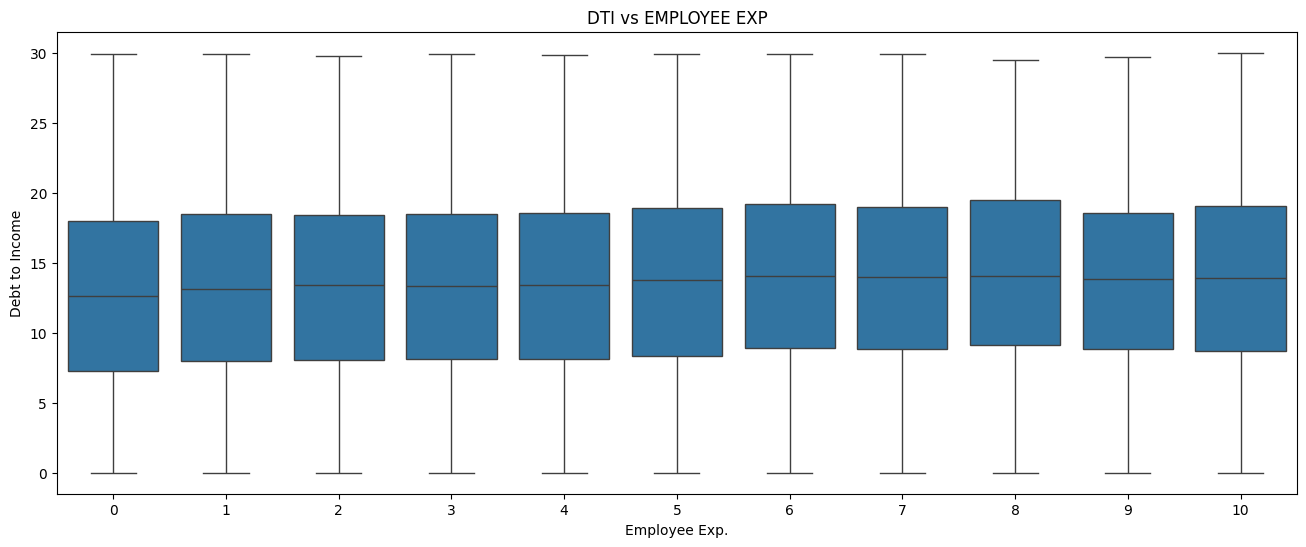

In [95]:
plt.figure(figsize=(16,6))
axi=sns.boxplot(x='emp_length',y='dti',data=loandfNew)
axi.set(xlabel='Employee Exp.', ylabel='Debt to Income',title='DTI vs EMPLOYEE EXP')
plt.show()

In [ ]:
#Radhika
# with bivariate analysis it is observed that employee with 10+ years of experience is having debt to income in high range 


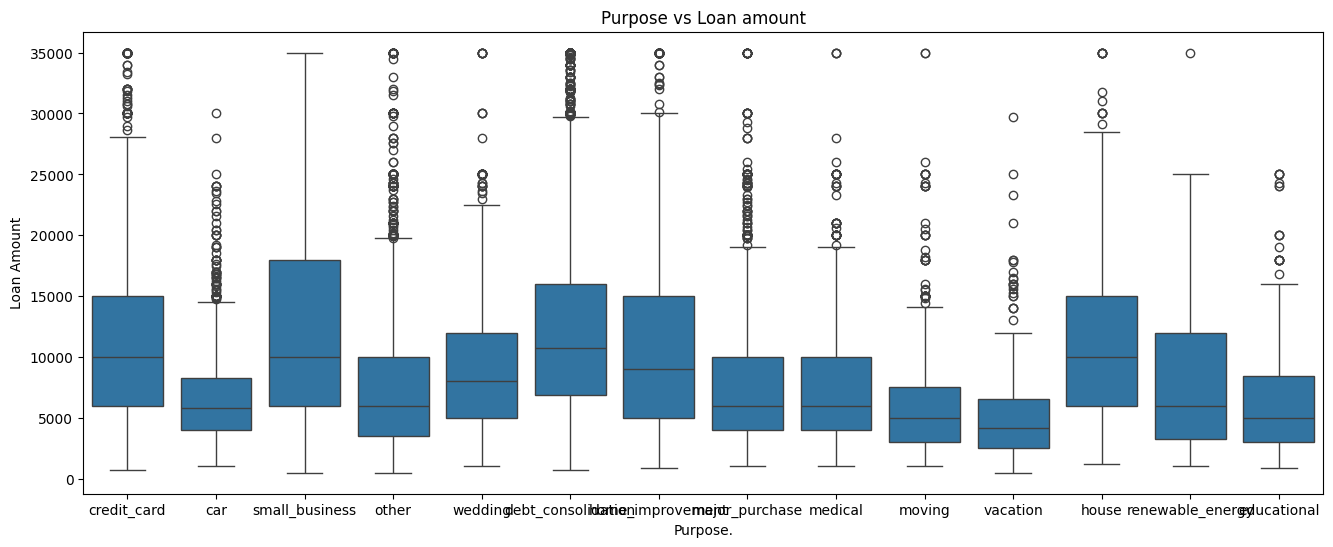

In [102]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x='purpose',y='loan_amnt',data=loandfNew)
ax.set(xlabel='Purpose.', ylabel='Loan Amount',title='Purpose vs Loan amount')
plt.show()

In [ ]:
#Radhika
# with bivariate analysis it is observed that purpose of Small business is having requirement of more loan amount 

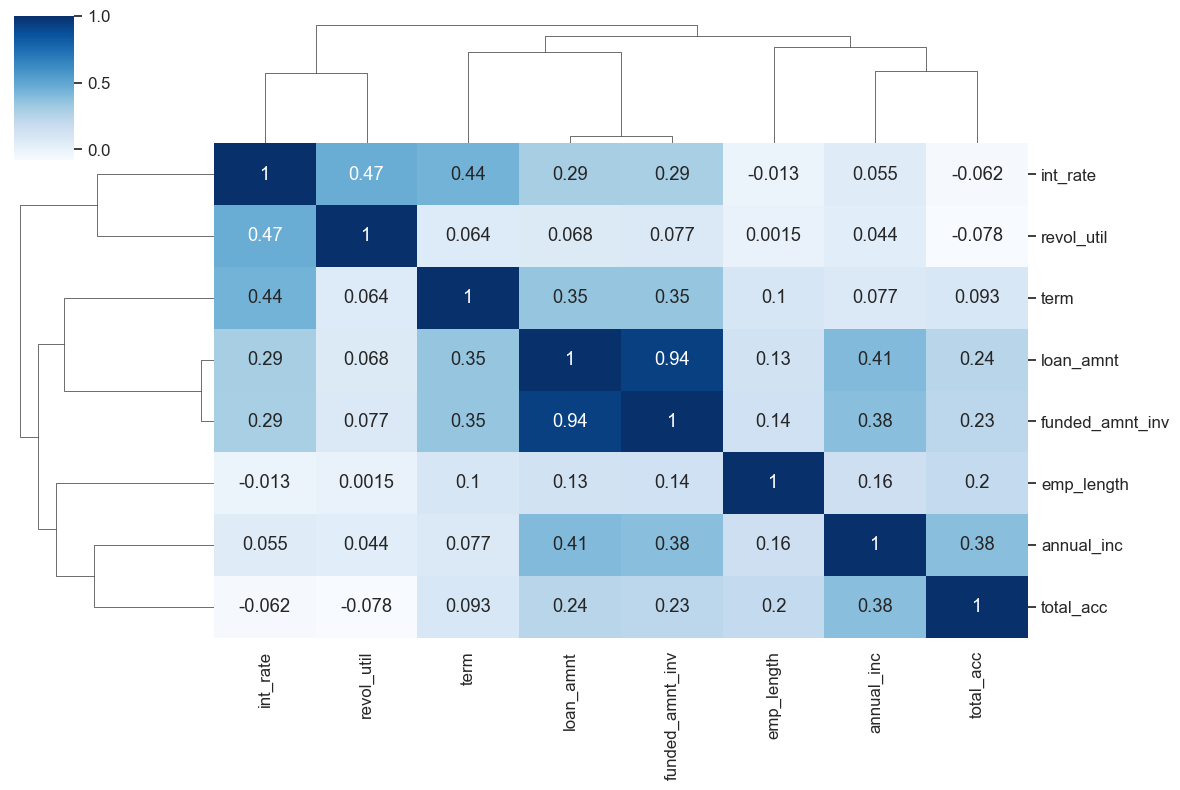

In [120]:
#Radhika
corr_loan = loandfNew[['loan_amnt','funded_amnt_inv','int_rate','revol_util','annual_inc','total_acc','emp_length','term']]
corr = corr_loan.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()